In [845]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gamma as gamma_function

In [846]:
total_nodes = 100
anchor_percent = 0.10
N = int((1 - anchor_percent) * total_nodes) # unknown nodes
M = total_nodes - N # anchor nodes

In [847]:
print(M)

10


In [848]:
#anchor nodes and unknown nodes random placement
X_unknown = []
X_anchor = []

for i in range(N):
    x_unknown = np.random.randint(100)
    y_unknown = np.random.randint(100)
  
    X_unknown.append([x_unknown, y_unknown])

for i in range(M):
    x_anchor = np.random.randint(100)
    y_anchor = np.random.randint(100)

    X_anchor.append([x_anchor, y_anchor])

In [849]:
# X_unknown

In [850]:
# len(X_unknown)

In [851]:
# X_anchor[0]

In [852]:
X_unknown = np.array(X_unknown)
X_anchor = np.array(X_anchor)

In [853]:
X_anchor_og = X_anchor.copy()
X_unknown_bak = X_unknown.copy()
# print(X_anchor[0])

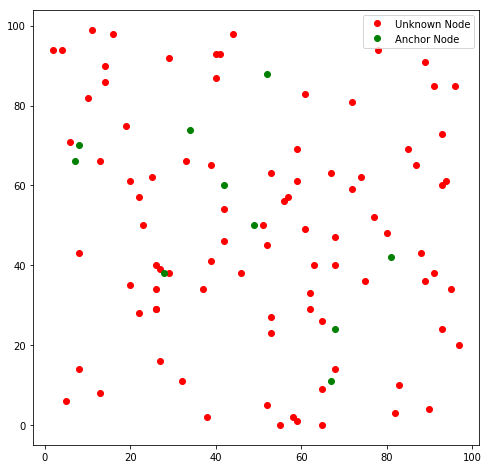

In [854]:
plt.figure(figsize=(8, 8))
plt.plot(X_unknown[:, 0], X_unknown[:, 1], 'ro', label="Unknown Node")
plt.plot(X_anchor[:, 0], X_anchor[:, 1], 'go', label="Anchor Node")
plt.legend()
plt.show()

In [855]:
t_range = 25 # transmission range
# t_range_best = 
gamma = 0.1 # noise factor

In [856]:
#objective function need to minimize
def objective(x, y):
    l = []
    for j in range(len(X_anchor)): # for every anchor nodes
        dij = np.power((np.power((x - X_anchor[j][0]), 2) + np.power((y - X_anchor[j][1]), 2)), 0.5)
        dij_dash = dij + np.random.normal(0, (gamma*dij))
        
        if dij < t_range:
            l.append(X_anchor[j])
    if len(l) >= 3:
#         print(l, 'anchor nodes')
#         print(X_unknown[i], 'unknown nodes')
        m = len(l)
        rerror = []
        for ancn in l:
            dij = np.power((np.power((x - ancn[0]), 2) + np.power((y - ancn[1]), 2)), 0.5)
            dij_dash = dij + (gamma * gamma * dij *dij)
            rerror.append(np.power((dij - dij_dash), 2))

        return np.sum(rerror) / m

    

In [857]:
v_x = []
for i in range(100):
    for j in range(100):
        if objective(i, j):
            v_x.append(objective(i, j))

In [858]:
# v_x

In [859]:
threshold = np.max(v_x) + 1

In [860]:
threshold

37.45130000000001

In [861]:
# X_unknown

In [862]:
# for i in range(N): # for every unknown nodes
# objective(84, 23)

In [863]:
alpha_min = 0.9
alpha_max = 1.0
pa_min = 0.05
pa_max = 0.25
X_min = 0
X_max = 100

In [864]:
N_itertotal = 100
# print(X_unknown)

In [865]:
fitness_values = []
for i in range(len(X_unknown)): # for every Unknown node
    fitness_values.append(objective(X_unknown[i][0], X_unknown[i][1]))

In [866]:
# fitness_values

In [867]:
#vk
f_values_legal = []
for i in range (len(fitness_values)):
    if fitness_values[i] is None:
        pass
    else:
        f_values_legal.append(fitness_values[i])

In [868]:
#vk
# f_values_legal

In [869]:
# print(X_unknown)

In [870]:
# import scipy.stats

In [871]:
def alpha(n_iter):
    return alpha_max - ((n_iter/ N_itertotal) * (alpha_max - alpha_min))

# Levy Flight
def levy():
    # lamda = np.random.uniform(1.1,3)
    lamda = 1.5
    temp = np.power(((gamma_function(1 + lamda) * np.sin(np.pi * (lamda /2))) / (gamma_function((1 + lamda)/2) * lamda * np.power(2, ((lamda - 1)/2)) )), 1/lamda)
    u = np.random.normal(0, temp)
    v = np.random.normal(0,1)
    r = u / (np.power(abs(v), (1/lamda)))

    return r

In [872]:
levy()

6.405506862191242

In [873]:
# print(X_unknown)
# print(len(X_unknown))

In [874]:
# np.zeros([N, 2])

In [875]:
X_unknown_org1 = np.zeros([N, 2])
X_unknown_org2 = np.zeros([N, 2])

ales = []

N_iter = 1
while (N_iter < N_itertotal) : # termination conditions
  X_js = []
  for i in range(len(X_unknown)): # For every unknown node
    X_j = X_unknown[i]
    X_j[0] = X_unknown[i][0] + alpha(N_iter) * levy()
    X_j[1] = X_unknown[i][1] + alpha(N_iter) * levy()
    # print(X_j)
    # print(X_j[0])
    if X_j[0] > X_max or X_j[1] > X_max:
      X_j = [X_max, X_max]
    
    if X_j[0] < X_min or X_j[1] < X_min:
      X_j = [X_min, X_min]

    F_j = objective(X_j[0], X_j[1]) or 0
    rand_k = np.random.randint(0, len(X_unknown))
    F_k = objective(X_unknown[rand_k][0], X_unknown[rand_k][1]) or 0

    if F_j > F_k:
      X_j[0] = X_unknown[rand_k][0]
      X_j[1] = X_unknown[rand_k][1]
      F_j = F_k

    X_js.append(X_j)
    # print(X_j)
    #end if
  #End For
  # print(X_js)

  Obj_X_Js = []
  for i in range(len(X_js)):
    Obj_X_Js.append(objective(X_js[i][0], X_js[i][1]))

  # print(Obj_X_Js)

  # best solution selection
  Obj_X_Js = np.array([np.inf if i is None else i for i in Obj_X_Js])
  print(Obj_X_Js)
  F_min = Obj_X_Js[np.argmin(Obj_X_Js)]
  # print(F_min)

  # mutation probability
  Pa_j = []

  for i in Obj_X_Js:
    K = i - F_min
    if K < 1:
      Pa_j.append(pa_min + (pa_max - pa_min) * K)
    else:
      Pa_j.append(pa_max / N_iter)

  # print(Pa_j)

  # new random solutions generation
  for i in range(len(Pa_j)):
    rand_temp = np.random.uniform(0, 1)
    if rand_temp < Pa_j[i]:
      my_x = np.random.randint(100)
      my_y = np.random.randint(100)
      X_js[i] = [my_x, my_y]
    #end if
  #end for



  # finding best solution after raplacement with new random solutions
  # Make copy of X_unknown
  X_unknown_copy = X_unknown.copy()
  X_unknown = X_js

#   Mark
  Obj_X_unknown = []
  for i in range(len(X_unknown)):
    Obj_X_unknown.append(objective(X_unknown[i][0], X_unknown[i][1]))

  Obj_X_unknown = np.array([np.inf if i is None else i for i in Obj_X_unknown])
  # print(Obj_X_unknown)
  F_best_arg = np.argmin(Obj_X_unknown)

  F_best_args = []

  for i in range(len(Obj_X_unknown)):
    if Obj_X_unknown[i] < threshold:
        F_best_args.append(i)

  # Updating Anchor List
  for i in F_best_args:
    X_anchor_temp = list(X_anchor)
    X_anchor_temp.append(X_js[i])
    X_anchor = np.array(X_anchor_temp)
    
  # Updating Unknown List    
  X_unknown_temp = []
  for i in range(len(X_unknown)):
    if i in F_best_args:
      ales.append([X_unknown[i], X_unknown_copy[i]])
    else:
      X_unknown_temp.append(X_unknown[i])
    

  X_unknown = np.array(X_unknown_temp)


  # 1. When no unknown nodes left are localisable
  if len(X_unknown) == 0:
        break

  N_iter += 1
      

[        inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf  4.10056667         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf  8.053              inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf 16.7742             inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf   

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf]
[        inf         inf         inf         inf         inf 15.59546667
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf]
[    inf     inf     inf     inf     inf     inf     inf     inf     inf
     inf     inf     inf     inf     inf     inf 6.79433     inf     

In [876]:
N_iter

100

In [877]:
X_unknown = np.array(X_unknown)

In [878]:
len(X_unknown)

4

In [879]:
# X_anchor

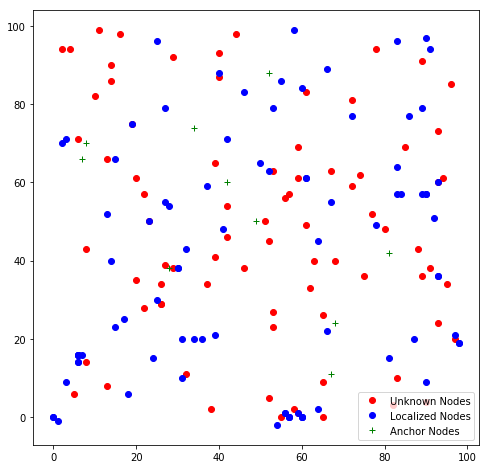

In [883]:
plt.figure(figsize=(8, 8))
plt.plot(X_unknown_bak[:80, 0], X_unknown_bak[:80, 1], 'ro', label="Unknown Nodes")
plt.plot(X_anchor[M:, 0], X_anchor[M:, 1], 'bo', label="Localized Nodes")
plt.plot(X_anchor_og[:, 0], X_anchor_og[:, 1], 'g+', label="Anchor Nodes")
# plt.plot(X_unknown[:10, 0], X_unknown[:10, 1], 'yo', label="Left Nodes")
plt.legend()
plt.show()

In [884]:
# Localization Success Ratio
def lsr():
    return ((len(X_anchor) - M) / len(X_unknown_bak)) * 100

In [885]:
lsr()

95.55555555555556

In [890]:
# Average Localization Error

ales

eculidean_dists = []

for al in ales:
    estimated = al[0]
    real = al[1]
    eculidean_dists.append( np.sqrt((estimated[0] - real[0])**2 + (estimated[1] - real[1])**2) )
#     print(al[0])

np.sum(ales)/len(ales)

172.34883720930233

In [891]:
(3 * 99 + 50 )/ 100

3.47

In [841]:
np.sqrt(2)

1.4142135623730951

In [632]:
# 1. When no unknown nodes left are localisable
# 2. Add multiple unknown nodes into anchor nodes
# 3. Capture results